In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from matplotlib import patches

figure_size=(10,10)

In [2]:
#make the data
num = 6
data = list(range(0, num))
pairs = itertools.product(data, repeat=2)
x, y = list(map(list, zip(*pairs)))
pairs = itertools.product(data, repeat=2)
z = [x - y for (x, y) in pairs]

In [3]:
import matplotlib.pyplot as plt 
import numpy as np    

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

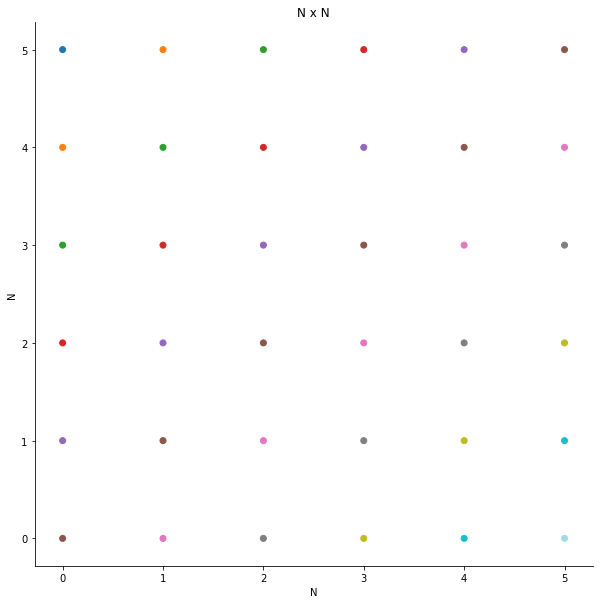

In [4]:
#each equivalence class is a different color
plt.figure(figsize=figure_size)
ax = plt.subplot(111)
plt.title("N x N")
plt.ylabel("N")
plt.xlabel("N")
plt.xticks(data)
plt.yticks(data)
plt.scatter(x, y,  c=z, cmap='tab20')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('NxN.png', bbox_inches='tight')
plt.show()

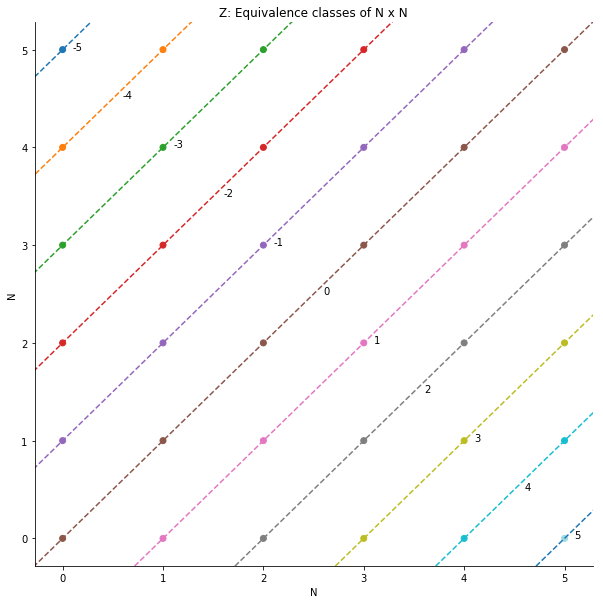

[[-5 -4 -3 -2 -1  0]
 [-4 -3 -2 -1  0  1]
 [-3 -2 -1  0  1  2]
 [-2 -1  0  1  2  3]
 [-1  0  1  2  3  4]
 [ 0  1  2  3  4  5]]


In [5]:
#plotting the Z axis
plt.figure(figsize=figure_size)
ax = plt.subplot(111)
plt.title("Z: Equivalence classes of N x N")
plt.ylabel("N")
plt.xlabel("N")
plt.xticks(data)
plt.yticks(data)
plt.scatter(x, y,  c=z, cmap='tab20')

old_axis = ax.get_xlim(), ax.get_ylim()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plotting the integers
#ax.annotate(s='', xy=(num-1, 0), xytext=(0, num-1), arrowprops=dict(arrowstyle='<->'))
for i in range(-5, 6, 1):
    x_vals = np.array(ax.get_xlim())
    y_vals = -i + x_vals
    ax.plot(x_vals, y_vals, '--') 
    ax.annotate(str(i), ((i+5.2)/2,  (num-i-1)/2))

ax.set_xlim(old_axis[0])
ax.set_ylim(old_axis[1])
plt.savefig("Zaxis.png", bbox_inches='tight')
plt.show()
pretty = np.flip(np.array(z).reshape((num, num)), axis=1)
print(pretty)

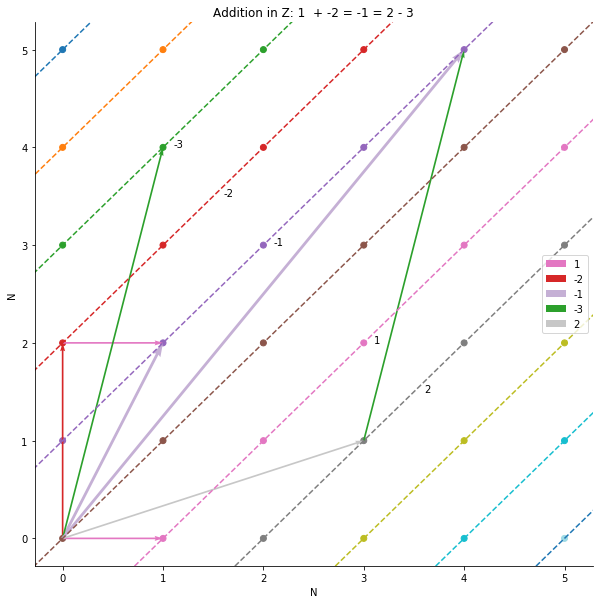

In [6]:
from matplotlib import cm
colors = cm.get_cmap('tab20')
plt.figure(figsize=figure_size)
ax = plt.subplot(111)
plt.title("Addition in Z: 1  + -2 = -1 = 2 - 3")
plt.ylabel("N")
plt.xlabel("N")
plt.xticks(data)
plt.yticks(data)
plt.scatter(x, y,  c=z, cmap='tab20')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.quiver(0, 0, 1, 0, angles='xy', color=colors.colors[12], scale_units='xy', scale=1,  width=0.003, label='1')
ax.quiver(0, 0, 0, 2, angles='xy', color=colors.colors[6], scale_units='xy', scale=1,  width=0.003, label='-2')
ax.quiver(0, 2, 1, 0, angles='xy', color=colors.colors[12], scale_units='xy', scale=1,  width=0.003, )
ax.quiver(0, 0, 1, 2, angles='xy', color=colors.colors[9], scale_units='xy', scale=1,  width=0.005, label='-1')

ax.quiver(0, 0, 1, 4, angles='xy', color=colors.colors[4], scale_units='xy', scale=1,  width=0.003, label='-3')
ax.quiver(0, 0, 3, 1, angles='xy', color=colors.colors[-5], scale_units='xy', scale=1,  width=0.003, label='2')
ax.quiver(3, 1, 1, 4, angles='xy', color=colors.colors[4], scale_units='xy', scale=1,  width=0.003, )
ax.quiver(0, 0, 4, 5, angles='xy', color=colors.colors[9], scale_units='xy', scale=1,  width=0.005)

old_axis = ax.get_xlim(), ax.get_ylim()
#plotting the integers
#ax.annotate(s='', xy=(num-1, 0), xytext=(0, num-1), arrowprops=dict(arrowstyle='<->'))
for i in range(-5, 6, 1):
    x_vals = np.array(ax.get_xlim())
    y_vals = -i + x_vals
    ax.plot(x_vals, y_vals, '--') 
    if i in [-1, 1, -2, -3, 2]:
        ax.annotate(str(i), ((i+5.2)/2,  (num-i-1)/2))
    
    
ax.set_xlim(old_axis[0])
ax.set_ylim(old_axis[1])

plt.savefig('addition.png', bbox_inches='tight')
plt.legend(loc='right')
plt.show()

In [7]:
num = 4
data = list(range(-num, num+1))
no_zero = list(data)
no_zero.remove(0)
pairs = itertools.product(data,no_zero)
y, x = list(map(list, zip(*pairs)))
pairs = itertools.product(data,no_zero)
#scale_factors = [3, 4, 6, 12, 1 , 12, 6, 4, 3]
scaled = [12 * x/ y for i, (x, y) in enumerate(pairs)]
vals = list(sorted(set(scaled)))
print(vals)
# slow but whatever
z = [vals.index(i) for i in scaled]
pretty = np.flip(np.array(z).reshape((len(data), len(no_zero))), axis=1)
print(pretty)

[-48.0, -36.0, -24.0, -18.0, -16.0, -12.0, -9.0, -8.0, -6.0, -4.0, -3.0, -0.0, 3.0, 4.0, 6.0, 8.0, 9.0, 12.0, 16.0, 18.0, 24.0, 36.0, 48.0]
[[ 5  4  2  0 22 20 18 17]
 [ 6  5  3  1 21 19 17 16]
 [ 8  7  5  2 20 17 15 14]
 [10  9  8  5 17 14 13 12]
 [11 11 11 11 11 11 11 11]
 [12 13 14 17  5  8  9 10]
 [14 15 17 20  2  5  7  8]
 [16 17 19 21  1  3  5  6]
 [17 18 20 22  0  2  4  5]]


[17, 18, 20, 22, 0, 2, 4, 5, 16, 17, 19, 21, 1, 3, 5, 6, 14, 15, 17, 20, 2, 5, 7, 8, 12, 13, 14, 17, 5, 8, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 10, 9, 8, 5, 17, 14, 13, 12, 8, 7, 5, 2, 20, 17, 15, 14, 6, 5, 3, 1, 21, 19, 17, 16, 5, 4, 2, 0, 22, 20, 18, 17]
72
23


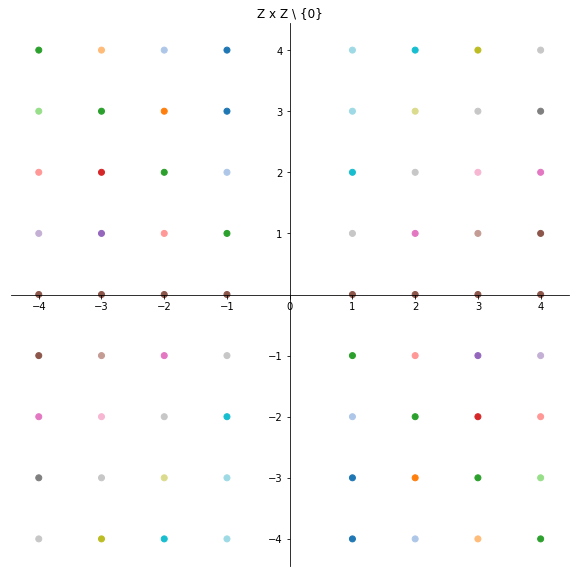

In [8]:
#each equivalence class is a different color
print(z)
print(len(z))
print(len(vals))
plt.figure(figsize=figure_size)
ax = plt.subplot(111)
plt.title("Z x Z \ {0}")
plt.xticks(data)
plt.yticks(no_zero)
plt.scatter(x, y,  c=z, cmap='tab20')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')
plt.savefig("ZxZ.png", bbox_inches='tight')
plt.show()

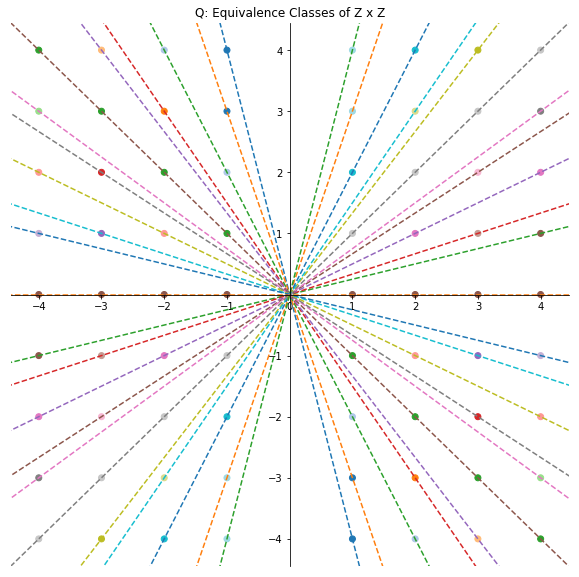

In [9]:
#each equivalence class is a different color
plt.figure(figsize=figure_size)
ax = plt.subplot(111)
plt.title("Q: Equivalence Classes of Z x Z")
plt.xticks(data)
plt.yticks(no_zero)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')
colors = cm.get_cmap('tab20')
plt.scatter(x, y,  c=z, cmap='tab20')
old_axis = ax.get_xlim(), ax.get_ylim()

    
for i in vals:
    x_vals = np.array(ax.get_xlim())
    y_vals = i/12 * x_vals
    ax.plot(x_vals, y_vals, '--') 
    #ax.annotate(str(i), ((i+5.2)/2,  (num-i-1)/2))
    
#q = patches.Arc((0, 0), 13, 12, angle=-90, theta1=2, theta2=178,  fill=False)
#ax.add_patch(q)

ax.set_xlim(old_axis[0])
ax.set_ylim(old_axis[1])
plt.savefig("Qaxis.png", bbox_inches='tight')
plt.show()

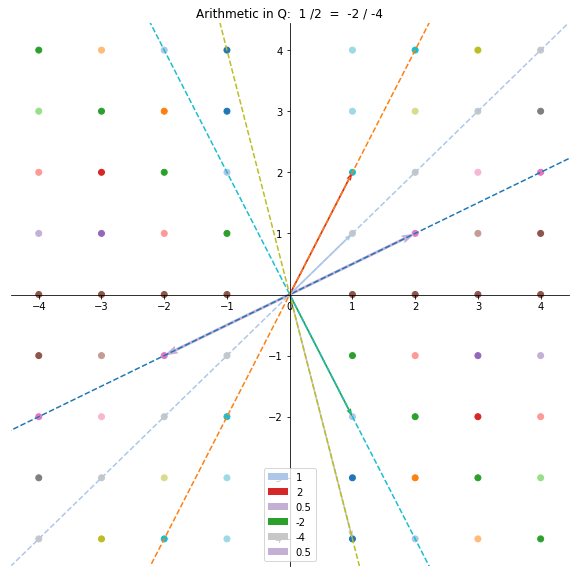

In [31]:
#each equivalence class is a different color
plt.figure(figsize=figure_size)
ax = plt.subplot(111)
plt.title("Arithmetic in Q:  1 /2  =  -2 / -4")
plt.xticks(data)
plt.yticks(no_zero)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.spines['left'].set_position('center')
colors = cm.get_cmap('tab20')
plt.scatter(x, y,  c=z, cmap='tab20')
old_axis = ax.get_xlim(), ax.get_ylim()

ax.quiver(0, 0, 1, 1, angles='xy', color=colors.colors[1], scale_units='xy', scale=1,  width=0.003, label='1')
ax.quiver(0, 0, 1, 2, angles='xy', color=colors.colors[6], scale_units='xy', scale=1,  width=0.003, label='2')
ax.quiver(0, 0, 2, 1, angles='xy', color=colors.colors[9], scale_units='xy', scale=1,  width=0.005, label='0.5')

ax.quiver(0, 0, 1, -2, angles='xy', color=colors.colors[4], scale_units='xy', scale=1,  width=0.003, label='-2')
ax.quiver(0, 0, 1, -4, angles='xy', color=colors.colors[-5], scale_units='xy', scale=1,  width=0.003, label='-4')
ax.quiver(0, 0, -2, -1, angles='xy', color=colors.colors[9], scale_units='xy', scale=1,  width=0.005, label='0.5')
    
for i in vals:
    if i/12 in [1. , .5, -2. , -4., 2]:
        x_vals = np.array(ax.get_xlim())
        y_vals = i/12 * x_vals
        ax.plot(x_vals, y_vals, '--', color=colors.colors[int(i/12)]) 
    
#q = patches.Arc((0, 0), 13, 12, angle=-90, theta1=2, theta2=178,  fill=False)
#ax.add_patch(q)

ax.set_xlim(old_axis[0])
ax.set_ylim(old_axis[1])
plt.legend()
plt.savefig("Qarithmetic.png", bbox_inches='tight')
plt.show()

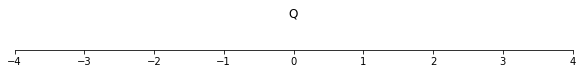

In [11]:
#Now how do we go from the rational to the reals?
plt.figure(figsize=(figure_size[0], 1))
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('center')
ax.get_yaxis().set_visible(False)
plt.title("Q")
plt.xticks(data)
plt.show()